In [ ]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

get_ipython().magic('matplotlib inline')
get_ipython().magic('reload_ext autoreload')
get_ipython().magic('autoreload 2')

## Unit Testing

In [ ]:
from streetstyle_dataset import StreetStyleDataset
import data_utils

transform = transforms.Compose([
        data_utils.ResizeTransform(299),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
dataset = StreetStyleDataset('../data/streetstyle27k', '../data', transform=transform)

def imshow(inp):
    """Imshow for Tensor."""
    plt.figure()
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)

images, labels = dataset.next_train()
img = torchvision.utils.make_grid(images[:4], nrow=2)
imshow(img)

plt.figure()
images, labels = dataset.next_eval()
img = torchvision.utils.make_grid(images[:4], nrow=2)
imshow(img)

images, labels = dataset.next_test()
img = torchvision.utils.make_grid(images[:4], nrow=2)
imshow(img)

In [ ]:
from classifier_model import StreetStyleClassifier
from torch.autograd import Variable

imag_var = Variable(images)
model = StreetStyleClassifier()
model.set_eval_attributes([True, True, False, True, False, False,False,False,False,False,False,False])
out = model(imag_var)
print(out)

# Model Training

In [3]:
import torch
import torch.nn as nn
import torchvision
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

get_ipython().magic('matplotlib inline')
get_ipython().magic('reload_ext autoreload')
get_ipython().magic('autoreload 2')

from classifier_test import StreetStyleClassifierTest

In [4]:
test = StreetStyleClassifierTest(use_gpu=True)

In [5]:
test.create_data_loaders()

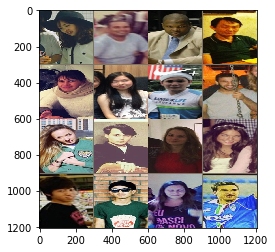

In [6]:
test.visualize_single_batch()

In [7]:
def get_num_parameters(model):
    total_num=0
    if type(model) == type(dict()):
        for key in model:
            for p in model[key].parameters():
                total_num+=p.nelement()
    else:
        for p in model.parameters():
            total_num+=p.nelement()
    return total_num

test.create_model()
print(test.model)
print('num params: ' + str(get_num_parameters(test.model)))

StreetStyleClassifier(
  (inception): Inception3(
    (Conv2d_1a_3x3): BasicConv2d(
      (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True)
    )
    (Conv2d_2a_3x3): BasicConv2d(
      (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True)
    )
    (Conv2d_2b_3x3): BasicConv2d(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True)
    )
    (Conv2d_3b_1x1): BasicConv2d(
      (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True)
    )
    (Conv2d_4a_3x3): BasicConv2d(
      (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True)
    )
    (Mixed_5b): Incepti

In [8]:
test.create_loss_function()

In [9]:
test.create_optimizer()

In [ ]:
kwargs = {}
kwargs["visualize_every_n_batches"] = 50
kwargs["save_every_n_batches"] = 200
test.train_model(num_iters=10000, **kwargs)

LOGGING MODEL AFTER 0 Iters:
Training Loss: [ 1.92241251  2.71468759  0.553186    0.75915331  0.55643028  1.1679076
  1.09246457  1.98532379  0.7639215   0.79259723  0.75546843  0.72254592]
Training Accuracy: [ 0.06451613  0.          0.8125      0.46666667  0.8125      0.3         0.32
  0.125       0.34375     0.3125      0.3125      0.48387097]
Eval Loss: [ 1.32269331  2.45032156  0.16978037  0.60652499  0.24962797  1.02592313
  1.05136577  1.91839105  0.62936702  0.32545957  0.41713829  0.70181893]
Eval Accuracy: [ 0.70499371  0.21709634  0.96838974  0.68742609  0.94371482  0.49980415
  0.38563956  0.1746872   0.71201213  0.90892124  0.86084021  0.63611963]
Eval MCA: [ 0.01426025  0.0368197   0.00844854  0.0614701   0.04194831  0.11243602
  0.11371212  0.15173708  0.02315061  0.02689938  0.05381264  0.03707052]
SAVED NEW BEST MODEL
After 50 Iters:
Training Loss: [ 1.09275179  2.06518943  0.20357071  0.57801511  0.32421845  0.90998021
  0.90107656  1.71345169  0.58188646  0.37995329

# Model Testing

In [ ]:
# load best model from saved checkpoint
checkpoint_name = './log/1513065292_400.tar'
log=torch.load(checkpoint_name)
model=log['best_model']
test.log = log
test.model = model

In [ ]:
# TODO plot the losses and accuracies
plt.figure()
matplotlib.rcParams['font.size'] = 14
for key in test.log:
    if 'loss' in key and test.log[key] is not None:
        y = test.log[key][2:]
        x = np.arange(0, 11450, 50)
        plt.plot(y,label=key)
        plt.legend()
#         plt.ylabel('Loss')
#         plt.xlabel('Batches (size 128)')
        plt.show()